# Исследование надежности заемщиков


К нам обратился банк, который хочет оптимизировать свою систему кредитного скоринга при помощи анилиза различных социальных и экономических факторов, потенциально влияющих на надежность заемщика. 

**Цель исследования**:

1. Проанализировать, влияют ли социальные и экономические факторы на надежность заемщиков нашего заказчика; 
2. Дать рекомендации по улучшению системы кредитного скоринга.

**Ход исследования**

Данные о поведении пользователей получены из файла data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Таким образом, исследование пройдёт в три этапа:

1) Обзор данных.

2) Предобработка данных.

3) Выполнение поставленных целей.

## Обзор данных

In [3]:
import pandas as pd
import numpy as np
import seaborn as sb

In [4]:
data = pd.read_csv('https://code.s3.yandex.net/datasets/data.csv')

In [5]:
data.head(20)

,children,days_employed,dob_years,education,education_id,family_status,family_status_id,gender,income_type,debt,total_income,purpose
0,1,-8437.673028,42,высшее,0,женат / замужем,0,F,сотрудник,0,253875.639453,покупка жилья
1,1,-4024.803754,36,среднее,1,женат / замужем,0,F,сотрудник,0,112080.014102,приобретение автомобиля
2,0,-5623.422610,33,Среднее,1,женат / замужем,0,M,сотрудник,0,145885.952297,покупка жилья
3,3,-4124.747207,32,среднее,1,женат / замужем,0,M,сотрудник,0,267628.550329,дополнительное образование
4,0,340266.072047,53,среднее,1,гражданский брак,1,F,пенсионер,0,158616.077870,сыграть свадьбу
5,0,-926.185831,27,высшее,0,гражданский брак,1,M,компаньон,0,255763.565419,покупка жилья
6,0,-2879.202052,43,высшее,0,женат / замужем,0,F,компаньон,0,240525.971920,операции с жильем
7,0,-152.779569,50,СРЕДНЕЕ,1,женат / замужем,0,M,сотрудник,0,135823.934197,образование
8,2,-6929.865299,35,ВЫСШЕЕ,0,гражданский брак,1,F,сотрудник,0,95856.832424,на проведение свадьбы
9,0,-2188.756445,41,среднее,1,женат / замужем,0,M,сотрудник,0,144425.938277,покупка жилья для семьи


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21525 entries, 0 to 21524
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   children          21525 non-null  int64  
 1   days_employed     19351 non-null  float64
 2   dob_years         21525 non-null  int64  
 3   education         21525 non-null  object 
 4   education_id      21525 non-null  int64  
 5   family_status     21525 non-null  object 
 6   family_status_id  21525 non-null  int64  
 7   gender            21525 non-null  object 
 8   income_type       21525 non-null  object 
 9   debt              21525 non-null  int64  
 10  total_income      19351 non-null  float64
 11  purpose           21525 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 2.0+ MB


Для анализа использовались данные по платежесобности заемщиков нашего клиента (заказчика) с 21525 наблюдениями, в которых была представлена информация о людях, воспользовавшихся услугами в данной финансовой организации с различными социальными и экономическими факторами, такими как:

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

## Предобработка данных

In [7]:
data.isna().sum()

children               0
days_employed       2174
dob_years              0
education              0
education_id           0
family_status          0
family_status_id       0
gender                 0
income_type            0
debt                   0
total_income        2174
purpose                0
dtype: int64

В двух столбцах есть пропущенные значения. На сумму дохода сильнее всего влияет тип занятости, поэтому заполнить пропуски в этом столбце нужно медианным значением по каждому типу из столбца income_type. 

In [8]:
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['total_income'].isna()), 'total_income'] = \
    data.loc[(data['income_type'] == t), 'total_income'].median()

### Обработка аномальных значений


In [9]:
# Заменим все отрицательные значения положительными в столбце "days_employed".

data['days_employed'] = data['days_employed'].abs()

In [10]:
#  Взглянем на медианные значения трудового стажа для каждой социальной группы
data.groupby('income_type')['days_employed'].agg('median')

income_type
безработный        366413.652744
в декрете            3296.759962
госслужащий          2689.368353
компаньон            1547.382223
пенсионер          365213.306266
предприниматель       520.848083
сотрудник            1574.202821
студент               578.751554
Name: days_employed, dtype: float64

In [11]:
#  Взглянем на уникальные значения столбца "children"
data['children'].unique()


array([ 1,  0,  3,  2, -1,  4, 20,  5], dtype=int64)

In [12]:
# В столбце children есть два аномальных значения. Необходимо их удалить.
data = data[(data['children'] != -1) & (data['children'] != 20)]

In [13]:
data['children'].unique()

array([1, 0, 3, 2, 4, 5], dtype=int64)

In [15]:
# Заполним пропуски в столбце days_employed медианными значениями по каждого типа занятости income_type
for t in data['income_type'].unique():
    data.loc[(data['income_type'] == t) & (data['days_employed'].isna()), 'days_employed'] = \
    data.loc[(data['income_type'] == t), 'days_employed'].median()

In [16]:
data.isna().sum()

children            0
days_employed       0
dob_years           0
education           0
education_id        0
family_status       0
family_status_id    0
gender              0
income_type         0
debt                0
total_income        0
purpose             0
dtype: int64

В столбце `total_income` данные представленны в формате вещественных чисел. Заменим их на целочисленные. 

In [17]:
data['total_income'] = data['total_income'].astype(int)

В столбце  `education` есть одни и те же значения, но записанные по-разному: с использованием заглавных и строчных букв. Приведем их к нижнему регистру.

In [18]:
data['education'] = data['education'].str.lower()

In [19]:
# Проверим количество дубликатов 
data.duplicated().sum()

71

In [20]:
# Удалим дублирующиеся строки
data = data.drop_duplicates()

Для более четкой интерпретации результатов добавим дополнительный столбец `total_income_category` с данными по уровню дохода с общепринятой европейской буквенной системой A-E:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

In [21]:
def categorize_income(income):
    try:
        if 0 <= income <= 30000:
            return 'E'
        elif 30001 <= income <= 50000:
            return 'D'
        elif 50001 <= income <= 200000:
            return 'C'
        elif 200001 <= income <= 1000000:
            return 'B'
        elif income >= 1000001:
            return 'A'
    except:
        pass
    
data['total_income_category'] = data['total_income'].apply(categorize_income)

А также добавим столбец `purpose_category` для систематизированного определения цели заема средств.

- `'операции с автомобилем'`,
- `'операции с недвижимостью'`,
- `'проведение свадьбы'`,
- `'получение образования'`.


In [22]:
def categorize_purpose(row):
    try:
        if 'автом' in row:
            return 'операции с автомобилем'
        elif 'жил' in row or 'недвиж' in row:
            return 'операции с недвижимостью'
        elif 'свад' in row:
            return 'проведение свадьбы'
        elif 'образов' in row:
            return 'получение образования'
    except:
        return 'нет категории'
    
data['purpose_category'] = data['purpose'].apply(categorize_purpose)

### Выявление зависимости между надежностью заемщика и некоторыми факторам


***Есть ли зависимость между количеством детей и возвратом кредита в срок?***

In [23]:
data_ch = pd.pivot_table(data,index='children', values='debt',aggfunc=['count','sum','mean'])
data_ch = data_ch.rename(columns={'count':'Общее кол-во', 'sum':'Закредитованные', 'mean':'Доля должников'})
print(data_ch)



         Общее кол-во Закредитованные Доля должников
                 debt            debt           debt
children                                            
0               14091            1063       0.075438
1                4808             444       0.092346
2                2052             194       0.094542
3                 330              27       0.081818
4                  41               4       0.097561
5                   9               0       0.000000


AxesSubplot(0.125,0.125;0.62x0.755)


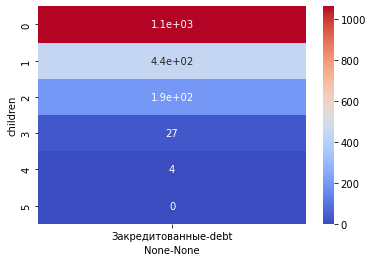

In [24]:
print(sb.heatmap(data_ch[[ 'Закредитованные']], annot=True, cmap= 'coolwarm'))

AxesSubplot(0.125,0.125;0.62x0.755)


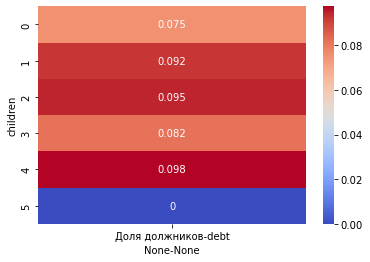

In [25]:
print(sb.heatmap(data_ch[[ 'Доля должников']], annot=True, cmap= 'coolwarm'))

**Вывод:** 

Итак, что мы видим в сводной таблице, представленной выше? Во-первых, сильно рознится количество человек, у которых отсутствуют дети, и тех, у которых детей 3 и более. Теперь ближе к сути проблемы.

Сразу можно отметить, что многодетные родители (в своем небольшом количестве) показали 100% результат отсутствия задолженности. В то же время, "испытуемые" с 1,2 и 4 детьми имею наиболее высокий процент задолженности (приблизительно 9-10% от общего числа). Те люди, у которых дети отсутствуют имею показатель в 7,5%. Родители троих детей имею показатель закредитованности выше "бездетных", но "ниже остальных (8,1%)

Что это значит? С появлением детей в семьях людям становится сложнее обслуживать свои кредитные обязательства. Общая тенденция показывает, что чем больше детей, тем выше закредитованности. 

***Есть ли зависимость между семейным положением и возвратом кредита в срок?***

In [26]:
data_fam = pd.pivot_table(data,index='family_status', values='debt',aggfunc=['count','sum','mean'])
data_fam = data_fam.rename(columns={'count':'Общее кол-во', 'sum':'Закредитованные', 'mean':'Доля должников'})
print(data_fam)

                      Общее кол-во Закредитованные Доля должников
                              debt            debt           debt
family_status                                                    
Не женат / не замужем         2796             273       0.097639
в разводе                     1189              84       0.070648
вдовец / вдова                 951              63       0.066246
гражданский брак              4134             385       0.093130
женат / замужем              12261             927       0.075606


AxesSubplot(0.125,0.125;0.62x0.755)


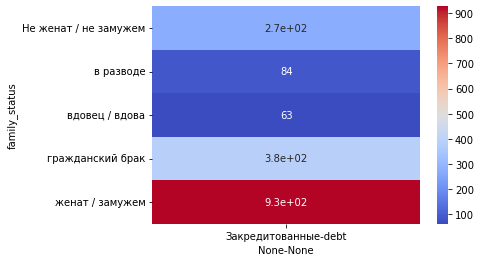

In [27]:
print(sb.heatmap(data_fam[[ 'Закредитованные']], annot=True, cmap= 'coolwarm'))

AxesSubplot(0.125,0.125;0.62x0.755)


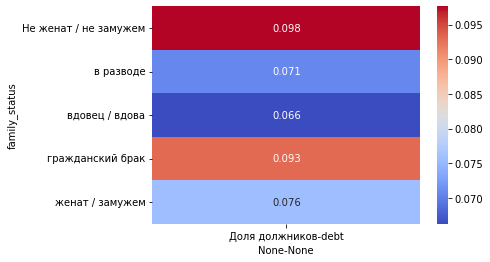

In [28]:
print(sb.heatmap(data_fam[[ 'Доля должников']], annot=True, cmap= 'coolwarm'))


**Вывод:** 

Какая тенденция наблюдается в показателях наличия задолженности и семейного положения? Что мы видим? В целом, в нашем выборке значительно больше женатых/замужних людей, тогда как меньше всего вдовцов/вдов и разведенных. 

А теперь взглянем на показатели закредитованности (долю должников) в каждой группе. Наиболее высокие показатели у холостых людей и тех, кто находится в гражданском браке (9,8% и 9,3% соответственно). Тогда как у разведенных и женатых(замужних) доля значительно ниже (7,1% и 7,6% соответственно). У вдовцов и вдов наименьшая доля (учитываем и наименьшее общее количество в выборке) - 6,6%.

То есть, тенденция следующая: люди, которые уже были в официальном браке или находятся в нем прямо сейчас закрывают свои задолженности значительно чаще, чем холостые и находящиеся в неофициальном браке.

***Есть ли зависимость между уровнем дохода и возвратом кредита в срок?***

In [29]:
data_inc = pd.pivot_table(data,index='income_type', values='debt',aggfunc=['count','sum','mean'])
data_inc = data_inc.rename(columns={'count':'Общее кол-во', 'sum':'Закредитованные', 'mean':'Доля должников'})
print(data_inc)

                Общее кол-во Закредитованные Доля должников
                        debt            debt           debt
income_type                                                
безработный                2               1       0.500000
в декрете                  1               1       1.000000
госслужащий             1451              86       0.059269
компаньон               5047             374       0.074103
пенсионер               3812             216       0.056663
предприниматель            2               0       0.000000
сотрудник              11015            1054       0.095688
студент                    1               0       0.000000


In [30]:
data_inc['Общее кол-во'].sum()

debt    21331
dtype: int64

AxesSubplot(0.125,0.125;0.62x0.755)


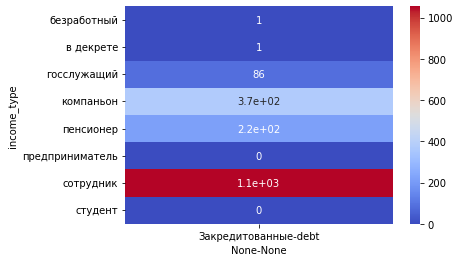

In [31]:
print(sb.heatmap(data_inc[[ 'Закредитованные']], annot=True, cmap= 'coolwarm'))

AxesSubplot(0.125,0.125;0.62x0.755)


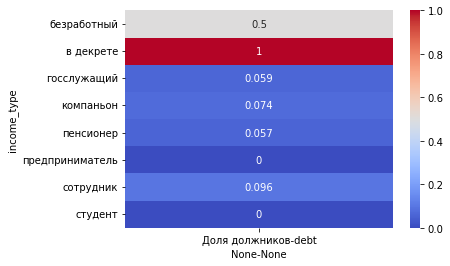

In [32]:
print(sb.heatmap(data_inc[[ 'Доля должников']], annot=True, cmap= 'coolwarm'))

In [33]:
data_inc_category = pd.pivot_table(data,index='total_income_category', values='debt',aggfunc=['count','sum','mean'])
data_inc_category = data_inc_category.rename(columns={'count':'Общее кол-во', 'sum':'Закредитованные', 'mean':'Доля должников'})
print(data_inc_category)

                      Общее кол-во Закредитованные Доля должников
                              debt            debt           debt
total_income_category                                            
A                               25               2       0.080000
B                             5014             354       0.070602
C                            15921            1353       0.084982
D                              349              21       0.060172
E                               22               2       0.090909


AxesSubplot(0.125,0.125;0.62x0.755)


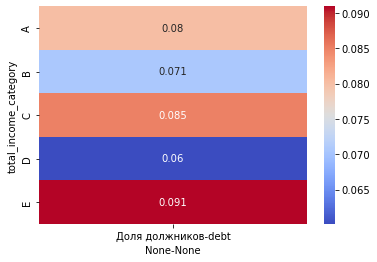

In [34]:
print(sb.heatmap(data_inc_category[[ 'Доля должников']], annot=True, cmap= 'coolwarm'))

**Вывод:** 

Нужно отметить, что в нашей выборке практически отсутствуют данные по некоторым социальным группам: безработные, в декрете, предприниматели, студенты. Их общее количество составляет лишь 6 человек, при выборке в 21331.

Наибольшую долю должников имеют сотрудники, практически в 10% от общего числа. Довольно высокая доля также у компаньонов (7,4%). У пенсионеров и госслужащих самые низкие показатели (5,9% и 5,7% соответственно).

Вывод, который можно сделать на основании представленных данны - люди, трудоустроеннные в коммерческой отрасли чаще не возвращают задолженности в сроки. Работники госорганов и пенсионеры реже нарушают свои кредитные обязательства.

**ДОПОЛНЕНИЕ:**

По уровню дохода в представленной выборке нет достаточного количества наблюдений по группам с наиболее высоким уровнем "А" и с наименьшим уровнем "Е". 

По оставшимся группам, можно отметить, что явной тенденции не наблюдается. Так называемый средний класс "С" имеет самый высокий показатель закредитованности - 8,5%. Классы "В" и "D" являются менее закредитованными, с показателями 7,1% и 6% соответственно.

***Как разные цели кредита влияют на его возврат в срок?***

In [35]:
data_purp = pd.pivot_table(data,index='purpose_category', values='debt',aggfunc=['count','sum','mean'])
data_purp = data_purp.rename(columns={'count':'Общее кол-во', 'sum':'Закредитованные', 'mean':'Доля должников'})
print(data_purp)

                         Общее кол-во Закредитованные Доля должников
                                 debt            debt           debt
purpose_category                                                    
операции с автомобилем           4279             400       0.093480
операции с недвижимостью        10751             780       0.072551
получение образования            3988             369       0.092528
проведение свадьбы               2313             183       0.079118


AxesSubplot(0.125,0.125;0.62x0.755)


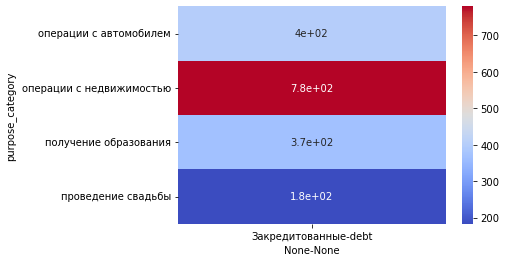

In [36]:
print(sb.heatmap(data_purp[[ 'Закредитованные']], annot=True, cmap= 'coolwarm'))

AxesSubplot(0.125,0.125;0.62x0.755)


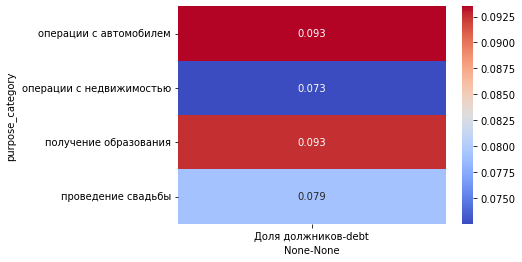

In [37]:
print(sb.heatmap(data_purp[[ 'Доля должников']], annot=True, cmap= 'coolwarm'))

**Вывод:** 

По целям кредитования можно сделать вывод, что значительно чаще люди не погашают вовремя свои задолженности, если берут денежные средства на операцию с автомобилями или на получение образования (9,3% для обеих категорий). Тогда как по операцией с недвижимостью и проведения праздничных мероприятий граждане, попавшие в выборку, более ответственно относятся к обслуживанию своих задолженностей с показателями в 7,3% и 7,9% закредитованных соответственно.

### Общий вывод ###

***Итоги исследования***

Подведем общие итоги данного исследования. Для анализа использовались данные по платежесобности заемщиков нашего клиента (заказчика) с 21525 наблюдениями, в которых была представлена информация о людях, воспользовавшихся услугами в данной финансовой организации с различными социальными и экономическими факторами, такими как:

- children — количество детей в семье
- days_employed — общий трудовой стаж в днях
- dob_years — возраст клиента в годах
- education — уровень образования клиента
- education_id — идентификатор уровня образования
- family_status — семейное положение
- family_status_id — идентификатор семейного положения
- gender — пол клиента
- income_type — тип занятости
- debt — имел ли задолженность по возврату кредитов
- total_income — ежемесячный доход
- purpose — цель получения кредита

**Цель**: Проанализиоровать, влияет ли семейное положение и количество детей клиента на факт погашения кредита в срок?

**Ход исследования**

Данные о поведении пользователей получены из файла data.csv. О качестве данных ничего не известно. Поэтому перед проверкой гипотез понадобится обзор данных.

Таким образом, исследование пройдёт в три этапа:

1) Обзор данных.
2) Предобработка данных.
3) Выполнение поставленной цели.

При обзоре данных были замечены пропуски в двух столбцах: ежемесячный доход, опыт работы в днях. Оба столбца были заполнены медианными значениями по соответствующему типу занятости, так как медианное значение наименее вего повлияет на итоговые результаты.

Помимо этого, было проделано несколько операций по обработке данных (в том числе избавления от отрицательных значений, приведение к необходимому формату и т.д.).

Для более четкой интерпретации результатов, были добавлены дополнительные столбцы с данными по уровню дохода с общепринятой европейской буквенной системой A-E:

- 0–30000 — `'E'`;
- 30001–50000 — `'D'`;
- 50001–200000 — `'C'`;
- 200001–1000000 — `'B'`;
- 1000001 и выше — `'A'`.

А также был добавлен столбец для систематизированного определения цели заема средств. После обработки данных, были построены необходимые графики и таблицы.

Итак. Какие выводы можно сделать по проект? 

- Наблюдается тенденция зависимости наличия задолженности у людей в представленной выборке и некоторых факторов (семейное положение, уровень дохода, наличие детей и пр.)
- Чем больше детей у человека, тем выше веротяность того, что у него/нее имеется незакрытая задолженности;
- Наличие опыта "супружеской жизни", скорее, положительно влияет на обслуживание задолженностей. Иными словами, вероятность отсутствия задолженности ниже у человека, который официально находится в браке или у него/нее имеется такой опыт;
- Цели кредита также влияют на наличие/отсутствие задолженности. По представенным данным, сложнее всего закрыть задолженности тем людям, которые в качестве цели указали какие-либо операции с автомобилем, а также те, которые указали получение образования в качестве цели.
- Уровень дохода не влияет на закредитованность человека. 
- Социальное положение имеет небольшое влияние на вероятность просроченной задолженности.


***Советы от экспертного аналитика***:

1. В систему скоринга необходимо включить коэффициент, который будет варьироваться в зависимости от семейного положения и количества детей.


2. Заказчику также стоит учитывать социальное положение человека при выдаче кредита.

3. Если клиенту требуются денежные средства на покупку/обслуживание автомобиля или же оплату обучения, то необходимо предварительно снижать скоринг таким клиентам по причине систематической просроченной задолженности. 

Подведем небольшой итог по наиболее успешным статитическим показателям. Наименьшая закредитованность:

- Человек, у которого нет детей;
- Вдовец/вдова;
- Пенсионер;
- Уровень дохода 30000 - 50000 руб.;
- Цель: операции с недвижимостью;

***Идеальный клиент с точки зрения статистических показателей***:

Пенсионер-вдовец, у которого нет детей, с пенсией в размере около 30-50 тысяч рублей, берущий заем под покупку недвижимости.